## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-010-13-RL-02

In [1]:
import matplotlib
import numpy as np
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.table import Table

WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]

ACTION_PROB = 0.25

def step(state, action):

    if state == A_POS:
        return A_PRIME_POS, 10

    if state == B_POS:
        return B_PRIME_POS, 5

    state = np.array(state)
    next_state = (state + action).tolist()
    x, y = next_state

    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward



def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])


    nrows, ncols = image.shape

    width, height = 1.0 / ncols, 1.0 / nrows



    # Add cells

    for (i,j), val in np.ndenumerate(image):

        # Index either the first or second item of bkg_colors based on

        # a checker board pattern

        idx = [j % 2, (j + 1) % 2][i % 2]

        color = 'white'



        tb.add_cell(i, j, width, height, text=val, 

                    loc='center', facecolor=color)



    # Row Labels...

    for i, label in enumerate(range(len(image))):

        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 

                    edgecolor='none', facecolor='none')

    # Column Labels...

    for j, label in enumerate(range(len(image))):

        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 

                           edgecolor='none', facecolor='none')

    ax.add_table(tb)



def figure_5_10_02_01():

    value = np.zeros((WORLD_SIZE, WORLD_SIZE))

    while True:

        # keep iteration until convergence

        new_value = np.zeros(value.shape)

        for i in range(0, WORLD_SIZE):

            for j in range(0, WORLD_SIZE):

                for action in ACTIONS:

                    (next_i, next_j), reward = step([i, j], action)

                    # bellman equation

                    new_value[i, j] += ACTION_PROB * (reward + DISCOUNT * value[next_i, next_j])

        if np.sum(np.abs(value - new_value)) < 1e-4:

            draw_image(np.round(new_value, decimals=2))
            plt.show()

            plt.close()

            break

        value = new_value



def figure_5_10_02_02():

    value = np.zeros((WORLD_SIZE, WORLD_SIZE))

    while True:

        # keep iteration until convergence

        new_value = np.zeros(value.shape)

        for i in range(0, WORLD_SIZE):

            for j in range(0, WORLD_SIZE):

                values = []

                for action in ACTIONS:

                    (next_i, next_j), reward = step([i, j], action)

                    # value iteration

                    values.append(reward + DISCOUNT * value[next_i, next_j])

                new_value[i, j] = np.max(values)

        if np.sum(np.abs(new_value - value)) < 1e-4:

            draw_image(np.round(new_value, decimals=2))
            plt.show()

            plt.close()

            break

        value = new_value






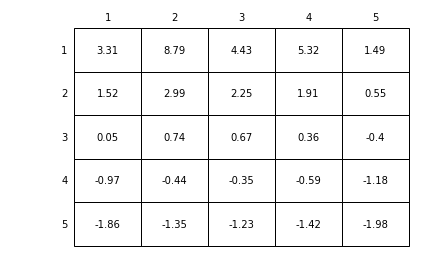

In [2]:
figure_5_10_02_01()

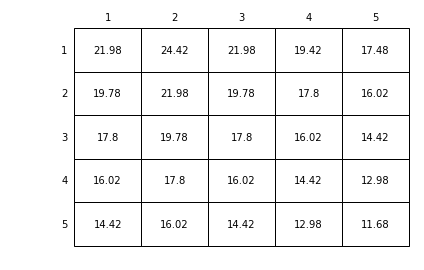

In [3]:
figure_5_10_02_02()

## Done

In [4]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-27 14:37:45.841840
